In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
m = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = m.load_data()

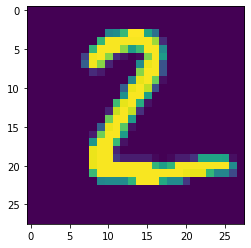

In [3]:
plt.imshow(x_test[1])

In [4]:
y_train[1]

0

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train[0]

5

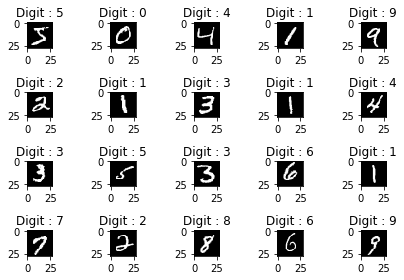

In [8]:
#fig = plt.figure()
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap='gray')
    plt.title("Digit : {}".format(y_train[i]))
    

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
img_rows = 28
img_cols = 28
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('X_train shape:', x_train.shape) 

X_train shape: (60000, 28, 28, 1)


In [35]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [36]:
y_train[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_train[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
#x_train = tf.keras.utils.normalize(x_train,axis = 1)
#x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
input_shape

(28, 28, 1)

In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [18]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(), loss = tf.keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [24]:
model_log = model.fit(x_train,y_train,batch_size = 128,epochs = 50,verbose = 1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 28s 459us/sample - loss: 1.0906 - accuracy: 0.6779 - val_loss: 0.8420 - val_accuracy: 0.8197
Epoch 2/50
60000/60000 [==============================] - 28s 458us/sample - loss: 1.0149 - accuracy: 0.6976 - val_loss: 0.7643 - val_accuracy: 0.8288
Epoch 3/50
60000/60000 [==============================] - 28s 461us/sample - loss: 0.9528 - accuracy: 0.7136 - val_loss: 0.7032 - val_accuracy: 0.8365
Epoch 4/50
60000/60000 [==============================] - 28s 473us/sample - loss: 0.8964 - accuracy: 0.7269 - val_loss: 0.6533 - val_accuracy: 0.8441
Epoch 5/50
60000/60000 [==============================] - 28s 459us/sample - loss: 0.8532 - accuracy: 0.7405 - val_loss: 0.6127 - val_accuracy: 0.8506
Epoch 6/50
60000/60000 [==============================] - 28s 463us/sample - loss: 0.8167 - accuracy: 0.7492 - val_loss: 0.5795 - val_accuracy: 0.8575
Epoch 7/50
60000/60000 [====================

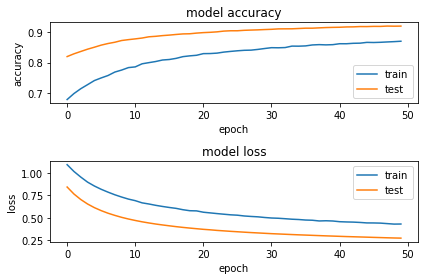

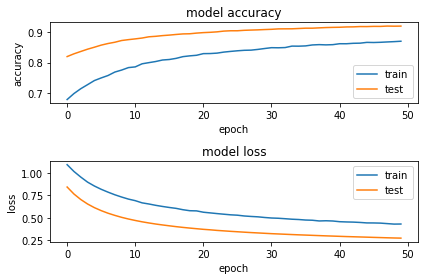

In [25]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [26]:
pred = model.predict(x_test)
pred

array([[3.5468893e-05, 1.1598655e-06, 4.3912583e-05, ..., 9.9897087e-01,
        2.6008562e-05, 5.9756974e-04],
       [3.9682747e-03, 2.7317560e-04, 9.6997100e-01, ..., 2.5040794e-07,
        3.9949650e-03, 1.9092919e-07],
       [9.2351920e-04, 9.8490638e-01, 3.7403740e-03, ..., 2.4949075e-03,
        2.9575762e-03, 3.9168214e-04],
       ...,
       [1.6100073e-04, 2.2430274e-04, 2.1512824e-04, ..., 1.2919814e-02,
        1.2671420e-02, 9.6672416e-02],
       [6.3536861e-03, 2.4809123e-03, 6.4458867e-04, ..., 8.1367977e-04,
        2.0913933e-01, 5.5260293e-04],
       [1.2520273e-04, 2.9744521e-07, 2.3722262e-04, ..., 2.9514626e-07,
        1.6029164e-06, 1.8846927e-07]], dtype=float32)

In [27]:
import numpy as np
np.argmax(pred[3])

0

In [40]:
x_test[3].shape

(28, 28, 1)

In [41]:
pred[0]

array([3.5468893e-05, 1.1598655e-06, 4.3912583e-05, 2.8503875e-04,
       2.4029294e-05, 1.2061470e-05, 3.8781754e-06, 9.9897087e-01,
       2.6008562e-05, 5.9756974e-04], dtype=float32)

<BarContainer object of 10 artists>

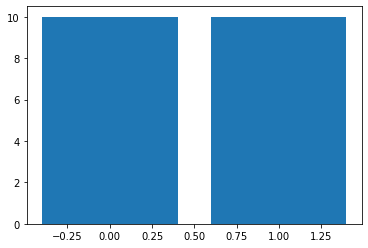

In [44]:
x = list(range(0,10))
#y = pred[]
plt.bar(pred[3],10)

In [49]:
l = ['a','']
l.remove('')
l

['a']